# C++ introduction

# Meta

## Goals
Easier future learning of C++

## Prerequisite
   Understanding the Python language and knowing how to write programs in Python

## Practice :
 You have to edit, compile and run code fragments, for instance on :
 - https://www.onlinegdb.com/
 - http://coliru.stacked-crooked.com/


# What is C++ ?
Compared to the python programming language, C++ is :
- compiled 
- with static typing

## Compiling
The C++ source code is not run directly and there is no interactive console (REPL) in C++.
The C++ code is "translated" (compiled) into an executable file that the processor can run.
https://godbolt.org/


## Cons of compilation
- no interactivity
- executable files are platform-specific (CPU & Operating System)

## Pros of compiling
   - execution speed
   - enable reaping benefits of /static typing/ with compilation errors (!)
   - (enable parallel -multicore- programming)


## Compiling in practice
Using a compiler on each source file and then linking. Can be done in one step,
especially for only one source file :

`g++ -std=c++17 source-file.cxx -o executable-file`

## Static typing
   Every expression has a type that is known at compile time (**before** running !)

```python
def is_inside_unit_circle(x, y):
    return x*x + y*y < 1
```

In [1]:
  bool is_inside_unit_circle(double x, double y){
    return x*x + y*y < 1.;
  }

In [2]:
 is_inside_unit_circle(10,0)

false

## Generic typing

In [3]:
  template<typename T> bool is_inside_unit_circle(T x, T y){
    return x*x + y*y < 1.;
  }

In [4]:
bool test= is_inside_unit_circle(0.1, 0.1);
test

true

##  Automatic typing

In [2]:
#include <iostream>
{
std::string str("test");
auto str2=str + " concat";
int i= 5;
auto j = i/2;
std::cout<< str2 << " "<< j;
}

test concat 2

## Type casting
`-Wconversion -Werror` to get an error instead of a warning

In [6]:
{
int c= 13.5f;
float d= c/2;
unsigned int e = -1; 
std::cout<< c << " " << d << " " << e <<std::endl;
}

input_line_17:3:8: warning: implicit conversion from 'float' to 'int' changes value from 13.5 to 13 [-Wliteral-conversion]
int c= 13.5f;
    ~  ^~~~~


13 6 4294967295


In [7]:
{
int c= static_cast<int>(13.5f);
float d= static_cast<float>(c/2);
unsigned int e = static_cast<int>(-1); 
std::cout<< c << " " << d << " " << e <<std::endl;
std::cout<< (-1 % 4) <<std::endl;
}

13 6 4294967295
-1


## Constness
The type can express that a value is constant.
```python
import math
math.pi= 2
print(math.cos(math.pi/2))
```

In [8]:
const double pi= std::acos(-1);
// nice try
pi= 2.0;
std::cout << std::cos(pi/2.) << std::endl;

input_line_19:4:3: error: cannot assign to variable 'pi' with const-qualified type 'const double'
pi= 2.0;
~~^
input_line_19:2:15: note: variable 'pi' declared const here
 const double pi= std::acos(-1);
 ~~~~~~~~~~~~~^~~~~~~~~~~~~~~~~


Interpreter Error: 

##  Compiling error
Automatic detection of typing errors
Much better that run-time "detection" (bugs) !
```python
n= input("Entrez le nombre de fléchettes à lancer")
inside= 0
for i in range(n):
  if is_inside_unit_circle(random.random(), random.random()):
    inside +=1
print("Sur {} fléchettes, {} à l'intérieur. Pi ~ {}".format(n, inside, 4 * inside/n) )
```

## Performance
```python
import random
import time

def is_inside_unit_circle(x, y):
    return x*x + y*y < 1

n= 100000000 #int(input("Entrez le nombre de fléchettes à lancer"))
inside= 0
start= time.time()
for i in range(n):
    if is_inside_unit_circle(random.random(), random.random()):
        inside +=1
print("simulation took {} seconds.".format(time.time() - start))
print("For {} darts, {} are inside. Pi ~ {}".format(n, inside, 4 * inside/n) )
```
`simulation took 63.49054312705994 seconds.
For 100000000 darts, 78538271 are inside. Pi ~ 3.14153084`

In [ ]:
#include <iostream>
#include <random>
#include <chrono>

/*bool is_inside_unit_circle(double x, double y){
  return x*x + y*y < 1;
}*/
{
  std::size_t seed = std::chrono::system_clock::now().time_since_epoch().count();
  std::uniform_real_distribution<double> distribution(0.0,1.0);
  auto generator=std::default_random_engine(seed);
  //std::cout<<"Entrez le nombre de fléchettes à lancer :";
  unsigned long n= 100000000; // std::cin >> n ;
  unsigned long inside= 0;
  auto start= std::chrono::system_clock::now();
  for(long i=0; i != n; ++i){
    if (is_inside_unit_circle(distribution(generator), distribution(generator))){
      ++inside;
    }
  }
  auto nanosecs= std::chrono::system_clock::now() - start;
  std::cout<<"simulation took " << (nanosecs.count()/10.e9)<< " seconds."<<std::endl;
  std::cout<<"For "<<n<<" darts, "<< inside << " are inside. Pi ~ "
           << (4. * inside)/n << std::endl;
}// : simulation took 0.209304 seconds. For 100000000 darts, 78544111 are inside. Pi ~ 3.14176


Darts simulation program online :
  - python [onlinegdb](https://onlinegdb.com/SJ8-FAozN)
  - cxx : [coliru](http://coliru.stacked-crooked.com/a/9210691bbfc5032e) and [onlinegdb](https://onlinegdb.com/rklD8fOifV)

## A Note on performance in python 
It is possible to write python programs with good performance … by using libraries that are not written in python (e.g.
`Numpy`) (They are often implemented in C++ !)


#   A Multi-paradigm language
One can write nearly anything in any way !

C++ evolved **a lot** in the last 20 years (→ look for recent information / books / tutorials)


# Object Oriented Programming 
C++ **enables** Object Oriented Programming, but it is outside of our focus.

## Notes on basic C++ programs
- To use a library, on uses the `#include` directive.
- The program is a function 
```C++
    int main(int argc, char* argv[]){}}
```

 # Types

## Primitive types

### integers
Usually, one uses types with no set size so as to fit the target CPU bus width (e.g. 32 bits vs 64 bits).
 - `char` 
 - `short`
 - `int`
 - `long`
 - `long long`

 `signed` (default except for `char`) or `unsigned`.

 `std::size_t` for positive indices.

In [3]:
 std::cout<<"sizeof(char): "<< 1 <<std::endl;
 std::cout<<"sizeof(short): "<< sizeof(short) <<std::endl;
 std::cout<<"sizeof(int): "<< sizeof(int) <<std::endl;
 std::cout<<"sizeof(long): "<< sizeof(long) <<std::endl;
 std::cout<<"sizeof(long long): "<< sizeof(long long) <<std::endl;
 std::cout<<"sizeof(std::size_t): "<< sizeof(std::size_t) <<std::endl;

sizeof(char): 1
sizeof(short): 2
sizeof(int): 4
sizeof(long): 8
sizeof(long long): 8
sizeof(std::size_t): 8


In [4]:
#include<climits>
{
int v= INT_MIN;
std::cout << v << " - 1 = "<< (v-1) << std::endl;
v= INT_MAX;
std::cout << v << " + 1 = "<< (v+1) <<std::endl;
}

-2147483648 - 1 = 2147483647
2147483647 + 1 = -2147483648


### floating point
 - `float`
 - `double` 

`double` are the same as python `float` :

In [5]:
if(0.1 * 3 == 0.3){
    std::cout<<"one can dream…" <<std::endl;
}else{
    std::cout<<"… or not !" <<std::endl;
}

… or not !


#### boolean
There is a `bool` type, but any integral value can be used as a boolean where `0` is `false`.

In [6]:
{
    bool b= 1 > 10;
    if( -4 ){
        std::cout<<"true";
    }else{
        std::cout<<"false";
    }
    std::cout <<std::endl<< ( -1 ? "true" : "false");
} 

true
true

##  Arrays, pointers and iterators

### Array
Values of the same type, in contiguous memory locations. The array is represented by the address in memory of the first element (no information about the number of elements !)
![alt text](https://gitlab.com/bhugueney/cxx-init-for-python-dev/raw/master/arrays.png "arrays in memory")

In [7]:
{
int array_i[]={1,0,-1,2};
double array_d[]={0.5, 6.,1.2};
std::cout <<'@'<<array_i<<": "<<array_i[0]<<", @"<<(array_i+1)<<": "<<array_i[1]<<std::endl;
std::cout <<'@'<<array_d<<": "<<array_d[0]<<", @"<<(array_d+1)<<": "<<array_d[1]<<std::endl;
}

@0x7fff1eb8b630: 1, @0x7fff1eb8b634: 0
@0x7fff1eb8b610: 0.5, @0x7fff1eb8b618: 6


### Pointers
(typed !)address in memory
![alt text](https://gitlab.com/bhugueney/cxx-init-for-python-dev/raw/master/ptr-array.png "pointer to array in memory")

In [8]:
{
int a=0;
int *ptr_a = &a;
*ptr_a = 2;
std::cout<<"a= "<< a << std::endl;
double arr[] = {-1.5, 0.5, 0.2};
double * ptr_arr= arr; // = &(arr[0]);
*ptr_arr=0.25f;
++ptr_arr; *ptr_arr= 1.;
std::cout<< "arr[0]:" << arr[0]<<", arr[1]:" << arr[1]<< std::endl;
std::cout<< "ptr_arr[-1]:" << ptr_arr[-1]<<", ptr_arr[0]:" << ptr_arr[0]<< std::endl;
}

a= 2
arr[0]:0.25, arr[1]:1
ptr_arr[-1]:0.25, ptr_arr[0]:1


### Array of arrays
![alt text](https://gitlab.com/bhugueney/cxx-init-for-python-dev/raw/master/array-array.png "array of arrays in memory")

In [9]:
{
int a[4][3]={{-1, 4, -1}, {0,1,3,}, {2, 1,0}, {0,0,0}};
std::cout<< "a[0][1]="<< a[0][1]<<" **a="<< **a << std::endl;
}

a[0][1]=4 **a=-1


### Iterators
Generalizing the concept of pointers to traverse collections of values.

In [10]:
#include <unordered_set>
{
std::unordered_set<std::string> data({"red", "blue", "green"});
for(auto it= data.begin(); it != data.end(); ++it){
    std::cout<< *it<<" ,";
}
}

green ,blue ,red ,

#### Character string
pointer to an array of bytes (`char`) terminated by the *null* byte ( `'\0'` value of `0`, not character `'0'` !)
![alt text](https://gitlab.com/bhugueney/cxx-init-for-python-dev/raw/master/ptr1-str.png "array of arrays in memory")

In [11]:
{
char const* const str="abcd";
for(char const* p=str; *p; p= p+1){
    std::cout<<"p= @"<< reinterpret_cast<void const*const>(p) <<" *p="<< (*p)<< std::endl;
}
}

p= @0x7f08ad936000 *p=a
p= @0x7f08ad936001 *p=b
p= @0x7f08ad936002 *p=c
p= @0x7f08ad936003 *p=d


### Beware of non ASCII characters

In [ ]:
char const * const str_ascii="e";
char const * const str_not_ascii="é";
std::cout << "strlen("<< str_ascii <<")="<<std::strlen(str_ascii) << std::endl;
std::cout << "strlen("<< str_not_ascii <<")="<<std::strlen(str_not_ascii) << std::endl;

#### Beware of comparisons and assignments
applies on *pointers* (not the actual strings themselves):

In [13]:
{
char const* str="toto";
char str2[]= {'t','o','t','o', '\0'};
std::cout<<"str:"<<str<<" str2:"<<str2<<" (str == str2): "<< (str == str2)<< std::endl;
char* str3= str2;
str3[1]='i';
std::cout<<"str2:"<<str2<<std::endl;
}

str:toto str2:toto (str == str2): 0
str2:tito


### std::string
  [std::string](http://www.cplusplus.com/reference/string/string/) : *class* enabling operations on strings of characters themselves instead of pointers (e.g. copy and compare)

requires `#include <string>`.

In [14]:
#include <string>
{
std::string str="toto";
char tmp[]= {'t','o','t','o', '\0'};
std::string str2=tmp ;
std::cout<<"str:"<<str<<" str2:"<<str2<<" (str == str2): "<< (str == str2)<< std::endl;
std::string str3= str2;
str3[1]='i';
std::cout<<"str2:"<<str2<<std::endl;
}

str:toto str2:toto (str == str2): 1
str2:toto


# Syntax

## instructions
instructions end with a `;`

## code blocks
Delimited by `{` et `}`, not by indentation (still used but for the human readers, not the compiler)
```python
x= 12
while x % 2 == 0:
    if x > 0:
        print("strictement positif")
    elif x < 0:
        print("strictement négatif")
    else:
        print("nul")
    x= x//2
```

In [15]:
{
int x= 12;
while(x % 2 == 0){
  if (x > 0){
    std::cout<<"strictement positif"<<std::endl;
  }else if (x < 0){
    std::cout<<"strictement positif"<<std::endl;
  }else{
    std::cout<<"nul"<<std::endl;
  }
  x/=2;
 }
}

strictement positif
strictement positif


### Beware of "missing" blocks !
- Code blocks are not required by the syntax rules. → defaults to a "single instruction bloc".
- A single "empty" instruction `;` is valid.

In [16]:
{
int x= -1;
if( x > 0)// try adding a ;
  std::cout << "positif" << std::endl;
  std::cout << "still positif ?" << std::endl;
std::cout << "not indented" << std::endl; 
}

still positif ?
not indented


## Operators can be redefined
The semantic (meaning) of operators depend on the types of the operands !
`<<`, `*`,…

In [17]:
{
int a=1;
a= a << 1;
int *ptr_a=&a;
a= a * *ptr_a;
std::cout << "a="<< a << std::endl;
}

a=4


## Conditional execution : `if`
The expression being tested is considered false if it evaluates to `0`, otherwise it is true.

In [18]:
{
int i=55;
if(i){
  std::cout<< i << " is true" <<std::endl;
}else{
  std::cout<< i << " is false" <<std::endl;
}
std::cout<< "true is "<< true << std::endl;
}

55 is true
true is 1


## Conditional evaluation `?:`
the expression 
```c++
( e ? t : f)
```
is equivalent to the python expression 
```python
t if e else f
```

In [19]:
{
int i=55;
std::cout<< i << " is "<< ( i ? "true" : "false") <<std::endl;
std::cout<< "true is "<< true << std::endl;
}

55 is true
true is 1


## Conditional branching : `switch`
`switch` statement branches to a code block according to the tested expression.
Do no forget the `break` !

In [20]:
{
int i= 10;
switch (i){
case 0: { std::cout<< " i is zero"; break;}
case 10: {std::cout <<" i is ten"; }
case 20: {std::cout <<" i is twenty (or I just forgot the break)"; break;}
default:{ std::cout << "i is "<<i;}
}
}

 i is ten i is twenty (or I just forgot the break)

## `while` loop
Same as `while` en python, but there also is a `do{}while();` variant.

In [21]:
{
int next;
do{
  next= std::rand() % 100;
}while((next % 2 == 0) || (next % 3 == 0));
std::cout<<next<<" n can neither divided by 2 nor by 3";
}

11 n can neither divided by 2 nor by 3

### `for` loop
`for( initialization; test; update)`

In [22]:
{
for(std::size_t i=0; i != 5; ++i){
  std::cout<<i<<' ';
}
std::cout<<std::endl;
char const* str="toto";
for(int i=0; str[i] != '\0'; ++i){
  std::cout<<str[i]<< ' ';
}
std::cout<<std::endl;
for(char const* ptr=str; *ptr; ++ptr){
  std::cout<< *ptr << '_';
}
std::cout<<std::endl;
}

0 1 2 3 4 
t o t o 
t_o_t_o_


## `for` over a collection
[Equivalent to iteration over iterators from begin to end](https://cppinsights.io/lnk?code=I2luY2x1ZGUgPGNzdGRpbz4KI2luY2x1ZGUgPHZlY3Rvcj4KCmludCBtYWluKCkKewogICAgY29uc3QgY2hhciBhcnJbMTBdezIsNCw2LDh9OwoKICAgIGZvcihjb25zdCBjaGFyJiBjIDogYXJyKQogICAgewogICAgICBwcmludGYoImM9JWNcbiIsIGMpOwogICAgfQogIAlzdGQ6OnZlY3RvcjxpbnQ+IHY9ezEsMzMsLTIsMH07CiAgZm9yKGludCAmIGkgOiB2KXsKICAgIGkqPSAzOwogIH0KfQ==&rev=1.0) : same as in python, but with static typing.

In [23]:
{
int array[]={1, 5, 7, -3};
for(int v : array){
  std::cout<< v <<',';
}
}

1,5,7,-3,

# Arguments passing
Arguments are passed by value (copy) except if type indicates a reference (`&`).

In [24]:
void by_value(int i){
  i+= 1;
}

In [25]:
void by_reference(int& i){
  i+= 1;
}

In [26]:
{
int j= 1;
by_value(j);
std::cout<< "j= "<< j << std::endl;
by_reference(j);
std::cout<< "j= "<< j << std::endl;
}

j= 1
j= 2


# Standard Library

## Data structures

## tuple
Using the [std::tuple](http://www.cplusplus.com/reference/tuple/tuple/) class requires `#include <tuple>`

In [27]:
{
std::tuple<int, double> t_if(2, 0.5);
std::tuple<int, std::string> t_is= std::make_tuple(0, "toto");

std::get<0>(t_is)= std::get<0>(t_if);
std::cout<< std::get<0>(t_is)<<','<<std::get<1>(t_is)<<std::endl;
}

2,toto


###  array
Using the [std::array](http://www.cplusplus.com/reference/array/array/) class `#include <array>`.
Size is part of the type (hence, fixed). Is to primitive types `[]` what `std::string` is to `char *` strings.

In [28]:
{
std::array<int, 3> a{-1, 2, 0};
auto b= a;
std::array<int, 3> c{-1, 2, 0};
b[0]= 5;
std::cout << a[0] << ", (a == c): "<<(a== c)<<std::endl;
}

-1, (a == c): 1


### vector
 [std::vector](http://www.cplusplus.com/reference/vector/vector/) is similar to the `list` in python but homogeneous (cf. static typing).
 

Requires 
```c++
#include <vector>`
```

In [29]:
{
std::vector<int> v_i;
v_i.push_back(1);
v_i.push_back(2);
v_i.push_back(4);
v_i.pop_back();
std::cout<<v_i.size()<<" elts:"<<v_i[0]<<","<<v_i[1]<<std::endl;
}

2 elts:1,2


### list
[std::list](http://www.cplusplus.com/reference/list/list/) allows efficient operations at the *front*, but no random access.

Requires`#include <list>`.


In [30]:
{
std::list<int> c;
c.push_front(1);
c.pop_back();
c.push_front(2);
c.push_front(4);
std::cout<<"c.empty():"<<c.empty()<<", elts:";
auto it=c.begin();
std::cout<< *it<<',';
++it;
std::cout<<*it<<std::endl;
}

c.empty():0, elts:4,2


### unordered_map
[std::unordered_map](http://www.cplusplus.com/reference/unordered_map/unordered_map/) is equivalent to python dictionaries but homogenous for keys and homogenous for values.


Requires `#include <unordered_map>`.

In [31]:
#include <unordered_map>
{
std::unordered_map<std::string, int> name_to_score;
name_to_score["toto"]=5;
name_to_score["bernard"]= 32;
name_to_score["patrick"]= 64;
for(auto const & kv : name_to_score){
  std::cout<<kv.first<<" : "<<kv.second<<std::endl;
}
}

patrick : 64
toto : 5
bernard : 32


### unordered_set
[std::unordered_set](http://www.cplusplus.com/reference/unordered_set/unordered_set/) allows *efficient* testing if the set contains a given element, and to avoid duplicates.


Requires `#include <unordered_set>`.

In [32]:
#include <unordered_set>
{
std::unordered_set<std::string> names;
names.insert("toto");
names.insert("titi");
names.insert("toto");
std::string to_find("titi");
if(names.find(to_find) != names.end()){
  std::cout << to_find <<" found in ";
}
for(auto name : names){
  std::cout<< name <<", ";
}
}

titi found in titi, toto, 

### Iterators
Data structures, among other things !, give acces to their elements through *iterators*.
They are classified according to the operations they provide on top of access (`*`) and comparison (`==`).

### Forward iterator
Incrementation to move to the next element with the `++` operator.

In [33]:
{
std::ostream_iterator<int> out(std::cout, ", ");
for(int i=0; i != 5; ++i, ++out){
  *out= i;
}
}

0, 1, 2, 3, 4, 

### Bidirectional iterator
On top the the *forward iterator* operations, a bidirectional iterator can move to the previous element with the `--` operator.

In [34]:
{
std::list<int> c{2, 3, 5, 7};
auto it=c.begin();
std::cout<< *it <<',';
++it;
std::cout<< *it <<std::endl;
--it;
std::cout<< *it <<std::endl;
}

2,3
2


### Random access iterator
On top of the *bidirectional iterator* operations, a random access iterator allows to move directly to any random position (similar to arithmetic operations on pointers)

In [35]:
{
std::vector<int> v_i {2, 3, 5, 7, 11};
auto it= v_i.begin();
it += 2;
std::cout<< *it <<' '<< *(it-2) <<' '<< *(it + 2) <<std::endl;
}

5 2 11


## Algorithms
One can use [algorithms](http://www.cplusplus.com/reference/algorithm/) on any interval of any data structure thanks to $\left[ begin, end\right[$ iterators intervals and output iterators.

They require `#include <algorithm>`.


### [copy](http://www.cplusplus.com/reference/algorithm/copy/)

In [36]:
{
std::vector<int> v{2, 3, 5, 7, 11};
std::copy(v.begin(), v.end(), std::ostream_iterator<int>(std::cout, ", "));
}

2, 3, 5, 7, 11, 

### [shuffle](http://www.cplusplus.com/reference/algorithm/shuffle/)
Requires a Random Number Generator, with `#include <random>`. The later can be initialized depending on the date at runtime (cf. `#include <chrono>`).

In [37]:
#include <random>
{
std::vector<int> v{2, 3, 5, 7, 11};
std::size_t seed = std::chrono::system_clock::now().time_since_epoch().count();
std::shuffle(v.begin(), v.end(), std::default_random_engine(seed)); 
std::copy(v.begin(), v.end(), std::ostream_iterator<int>(std::cout, ", "));
}

3, 5, 2, 7, 11, 

### [sort](http://www.cplusplus.com/reference/algorithm/sort/)
One can sort an interval of elements with a parameterizable ordering relation.

In [38]:
{
std::vector<int> v{7, 3, 2, 5, 11};
std::size_t seed = std::chrono::system_clock::now().time_since_epoch().count();
std::shuffle(v.begin(), v.end(), std::default_random_engine(seed)); 
std::sort(v.begin(), v.end());
std::copy(v.begin(), v.end(), std::ostream_iterator<int>(std::cout, ", "));
}

2, 3, 5, 7, 11, 

### Argument passing semantic
By default, values are passed by **copy** for all types.

### Argument passing by copy

In [39]:
void f(int i){
  i+=1;
}

In [40]:
void f(std::vector<int> v){
 v.push_back(0);
}

In [41]:
{
 int i=0;
 f(i);
 std::cout<< i <<std::endl;
 std::vector<int> v{1, 2};
 f(v);
 std::cout<< v.size() << std::endl;
}

0
2


### Argument passing by pointer
Beware if the pointer is`NULL` or [nullptr](http://en.cppreference.com/w/cpp/language/nullptr), any use (except for comparison, for instance with `nullptr` will terminate the program.

In [42]:
void f(int* i){
  *i +=1;
}

In [43]:
void f(std::vector<int>* v){
 (*v).push_back(0);
 v->push_back(0);
}

In [44]:
/*int main(int argc, char* argv[])*/{
 int i=0;
 f(&i);
 std::cout<< i <<std::endl;
 std::vector<int> v{1, 2};
 f(&v);
 std::cout<< v.size() << std::endl;
}

1
4


### Argument passing by reference

One might want to :
- avoid paying the cost of making a copy
- allow modification of a value passed as argument
- ensure that there actually is a value (no invalid pointer)

$\rightarrow$ passing by reference

In [45]:
void g(int& i){
  i +=1;
}

In [46]:
void g(std::vector<int>& v){
 v.push_back(0);
}

In [47]:
/*int main(int argc, char* argv[])*/{
 int i=0;
 g(i);
 std::cout<< i <<std::endl;
 std::vector<int> v{1, 2};
 g(v);
 std::cout<< v.size() << std::endl;
}


1
3


# Error handling
Exceptions like in python (but **only** for errors).

In [48]:
#include <stdexcept>

In [49]:
std::cout <<"before…";
throw std::runtime_error("Unknown exception");
std::cout<<"after ?";

before…

Standard Exception: Unknown exception

# Code Examples

## Limits

In [1]:
#include <tuple>
#include <vector>
#include <limits>

std::tuple<int,int> limites(std::vector<int> const& xs){
    int min_x= std::numeric_limits<int>::max();
    int max_x= std::numeric_limits<int>::min();
    for(int const & x : xs){// or auto & x
      if(x < min_x){
        min_x= x;
      }
      if( x > max_x){
        max_x= x;
      }
    }
    return std::make_tuple(min_x, max_x);
  }

In [2]:

  template<typename T>
  std::tuple<T, T> limites_generic(std::vector<T> const& xs){
    T min_x= std::numeric_limits<T>::max();
    T max_x= std::numeric_limits<T>::min();
    for(T const & x : xs){ // or auto& x
      if(x < min_x){
        min_x= x;
      }
      if( x > max_x){
        max_x= x;
      }
    }
    return std::make_tuple(min_x, max_x);
  }


In [4]:
  template<typename It>
  auto
  limites_iter(It begin, It end)-> std::tuple<decltype(*begin), decltype(*begin)>{
    typedef decltype(*begin) T;
    T min_x= *begin; //!!!
    T max_x= *begin;
    for(It it=begin; it != end; ++it){
      if(*it < min_x){
        min_x= *it;
      }
      if( *it > max_x){
        max_x= *it;
      }
    }
    return std::make_tuple(min_x, max_x);
  }


In [5]:
  template<typename It>
  auto
  limites_iter2(It begin, It end){
    It min_it= begin; //!!!
    It max_it= begin;
    for(It it=begin; it != end; ++it){
      if(*it < *min_it){
        min_it= it;
      }
      if( *it > *max_it){
        max_it= it;
      }
    }
    return std::make_tuple(*min_it, *max_it);// !!!
  }
  template<typename It>
  std::tuple<It, It> limites_idiomatic(It begin, It end){
    It min_it= begin; //!!!
    It max_it= begin;
    for(It it=begin; it != end; ++it){
      if(*it < *min_it){
        min_it= it;
      }
      if( *it > *max_it){
        max_it= it;
      }
    }
    return std::make_tuple(min_it, max_it);
  }



Actually, [std::minmax_element](https://en.cppreference.com/w/cpp/algorithm/minmax_element) and [std::minmax](https://en.cppreference.com/w/cpp/algorithm/minmax) already exist and are obviously the truly idiomatic code.

## Fusion

In [6]:
  // char != code point !
  std::string fusion(std::string const& str1, std::string const& str2){
    std::string res;
    if(str1.size() == str2.size()){
      for(auto it1= str1.begin(), it2= str2.begin(); it1 != str1.end(); ++it1, ++it2){
        res.push_back(*it1);
        res.push_back(*it2);
      }
    }
    return res;
  }

In [8]:
  // char != code point !
  template<typename It1, typename It2, typename Out>
  Out fusion_idiomatic(It1 begin1, It1 end1, It2 begin2, It2 end2, Out out){
    if(std::distance(begin1, end1)== std::distance(begin2, end2)){
      for(; begin1 != end1; ++begin1, ++begin2){
        *out= *begin1;
        ++out;
        *out= *begin2;
        ++out;
      }
    }
    return out;
  }

## Palindrome

In [9]:
  bool palindrome(std::string const& str){
    for(std::size_t i= 0; i != str.size()/2; ++i){
      if(str[i] != str[str.size()-i]){
        return false;
      }
    }
    return true;
  }

In [10]:
  bool palindrome2(std::string const& str){
    auto it= str.begin();
    auto r_it= str.rbegin();
    for(std::size_t i= 0; i != str.size()/2; ++i, ++it, ++r_it){
      if(*it != *r_it){
        return false;
      }
    }
    return true;
  }

In [13]:
template<typename It>
bool palindrom_idiomatic(It begin, It end){
    std::size_t const half= std::distance(begin, end)/2;
    std::reverse_iterator<It> rbegin(end);
    for(std::size_t i=0; i != half; ++i, ++begin, ++rbegin){
      if(*begin != *rbegin){return false;}
    }
    return true;
  }

## Data extraction

In [2]:
#include <tuple>
#include <vector>
#include <string>
typedef std::tuple<std::string, std::string, double> data_t;



In [3]:
std::vector<data_t> extraction(std::vector<data_t> const& xs, std::string const& crit){
    std::vector<data_t> res;
    for(data_t const & x : xs){
      if(std::get<0>(x) == crit){
        res.push_back(x);
      }
    }
    return res;
  }

In [5]:
template<typename It, typename Out>
Out extraction_idiomatic(It begin, It end, Out out, std::string const& crit){
  for(; begin != end; ++begin){
    if(std::get<0>(*begin) == crit){
      *out= *begin;
      ++out;
    }
  }
  return out;
}

/*
std::copy_if(data.begin(), data.end(), std::back_inserter(selection)
          , [&category](data_t const& x)->bool{return std::get<0>(x) == category;})
*/

In [9]:
typedef std::tuple<std::string, std::string, double> data_t;

In [10]:
std::vector<data_t> extract_dict(std::unordered_map<std::string, std::vector<data_t> > dict, std::string const& cat){
  return dict[cat];
}

## Folding (Pliage)

In [12]:
#include <iostream> 
void pliage(std::string const& str, std::size_t n){
  for(std::size_t i(0); i != str.size(); ++i){
    if( (i != 0) && (i % n == 0)){
      std::cout << std::endl;
    }
    std::cout<<str[i];
  }
}

In [13]:
template<typename In, typename Out>
Out pliage_idiomatic(In begin, In end, Out out, std::size_t n){
  for(std::size_t i(0); begin != end; ++begin){
    if((i != 0) && (i % n == 0)){
      *out= '\n';
      ++out;
    }
    *out= *begin;
    ++out;
  }
  return out;
}

# Programs

## Hangman
We can try to rewrite the hangman game in C++, however, the letters (or worse, glyphs !) are not properly handled (letters are not to be confused with `char`), the program won't work with letters coded on more than one byte (accented letters for instance). For this kind of programs without much performance imperative, python is more appropriate.

In [1]:
#include <iostream>
#include <string>
#include <vector>

std::string initialiser_mot_mystere(std::string const& mot){
  std::string res;
  for(std::size_t i=0; i != mot.size(); ++i){
    res.push_back('_');
  }
  return res;
}

In [2]:
void affichage_mot_mystere(std::string const& mot_mystere){
  for(char const& c : mot_mystere){
    std::cout << c << ' ';
  }
  std::cout<<std::endl;
}

In [3]:
void affichage_coups_restants(int nb_coups_restants){
  std::cout << "Il vous reste " << nb_coups_restants << " coups."<<std::endl;
}

In [4]:
char saisie_joueur2(){
  std::string saisie;
  while( saisie.size() == 0){
    std::cout << "Lettre å tester :"<<std::endl;
    std::cin >> saisie;
    std::cout << std::endl;
  }
  return saisie[0];
}

In [5]:
std::string mise_a_jour_mot_mystere(char lettre, std::string const& mot, std::string const& mot_mystere){
  std::string res;
  for(std::size_t i=0; i != mot.size(); ++i){
    res.push_back(mot[i] == lettre ? lettre : mot_mystere[i]);
  }
  return res;
}

In [6]:
std::string choix_joueur2(std::string const& mot, std::string const& mot_mystere
                          , int nb_coups_restants){
  affichage_mot_mystere(mot_mystere);
  affichage_coups_restants(nb_coups_restants);
  char lettre_saisie= saisie_joueur2();
  return mise_a_jour_mot_mystere(lettre_saisie, mot, mot_mystere);
}

In [7]:
bool test_jeu_fini(std::string const& mot_mystere, int nb_coups_restants){
  if(mot_mystere.find('_') == std::string::npos){
    std::cout<< "Félicitations! Vous avez trouvé le mot mystère."<< std::endl;
    return true;
  }else if(nb_coups_restants == 0){
    std::cout<< "Félicitations! Vous avez trouvé le mot mystère."<< std::endl;
    return true;
  }
  return false;
}

In [8]:
int main(int argc, char* argv[]){
  while(true){
    std::cout <<  "*************************************" << std::endl
              << "Bienvenu sur le jeu du Pendu" << std::endl
              << "1 - Commencer une nouvelle partie" << std::endl
              << "0 - Quitter" << std::endl
              << "*************************************"<< std::endl;
    int choix;
    std::cout<<"Faites votre choix"<<std::endl;
    std::cin >> choix;
    if( choix == 0){
      break;
    }
        std::cerr<<" choix:" << choix <<std::endl;
    if( choix != 1){
      continue;
    }
    std::string mot;
    std::getline(std::cin, mot);// flush line break
    while( mot.size() ==0){
      std::cout << "Joueur 1 - Saisissez le mot mystère:" << std::endl;
      std::getline(std::cin, mot);
    }

    std::string mot_mystere= initialiser_mot_mystere(mot);
    for(std::size_t i=0; i != 100; ++i){
      std::cout << std::endl;
    }
    for(int nb_coups_restants= 10; !test_jeu_fini(mot_mystere, nb_coups_restants); --nb_coups_restants){
      mot_mystere= choix_joueur2(mot, mot_mystere, nb_coups_restants);
    }
  }
}

# Rosetta Code (Python & C++), Project

Cf. [Notebook in Python](https://mybinder.org/v2/gl/bhugueney%2Fcxx-init-for-python-dev/master?filepath=rotate_ppm_py.ipynb) and [Notebook in C++](https://mybinder.org/v2/gl/bhugueney%2Fcxx-init-for-python-dev/master?filepath=rotate_ppm_cxx.ipynb).

# Original example notebook for xeus-cling

## Classes

In [50]:
class Foo
{
public:

    virtual ~Foo() {}
    
    virtual void print(double value) const
    {
        std::cout << "Foo value = " << value << std::endl;
    }
};

In [51]:
Foo bar;
bar.print(1.2);

Foo value = 1.2


## Polymorphism

In [52]:
class Bar : public Foo
{
public:

    virtual ~Bar() {}
    
    virtual void print(double value) const
    {
        std::cout << "Bar value = " << 2 * value << std::endl;
    }
};

In [53]:
Foo* bar2 = new Bar;
bar2->print(1.2);
delete bar2;

Bar value = 2.4


## Templates

In [54]:
#include <typeinfo>

template <class T>
class FooT
{
public:
    
    explicit FooT(const T& t) : m_t(t) {}
    
    void print() const
    {
        std::cout << typeid(T).name() << " m_t = " << m_t << std::endl;
    }
    
private:
    
    T m_t;
};

template <>
class FooT<int>
{
public:
    
    explicit FooT(const int& t) : m_t(t) {}
    
    void print() const
    {
        std::cout << "m_t = " << m_t << std::endl;
    }
    
private:
    
    int m_t;
};

In [55]:
FooT<double> foot1(1.2);
foot1.print();

d m_t = 1.2


In [56]:
FooT<int> foot2(4);
foot2.print();

m_t = 4


## C++11 / C++14 support

In [57]:
class Foo11
{
public:
    
    Foo11() { std::cout << "Foo11 default constructor" << std::endl; }
    Foo11(const Foo11&) { std::cout << "Foo11 copy constructor" << std::endl; }
    Foo11(Foo11&&) { std::cout << "Foo11 move constructor" << std::endl; }
};

In [58]:
Foo11 f1;
Foo11 f2(f1);
Foo11 f3(std::move(f1));

Foo11 default constructor
Foo11 copy constructor
Foo11 move constructor


In [59]:
#include <vector>

std::vector<int> v = { 1, 2, 3};
auto iter = ++v.begin();
v

{ 1, 2, 3 }

In [60]:
*iter

2

... and also lambda, universal references, `decltype`, etc ...

## Documentation and completion

 - Documentation for types of the standard library is retrieved on cppreference.com.
 - The quick-help feature can also be enabled for user-defined types and third-party libraries. More documentation on this feature is available at https://xeus-cling.readthedocs.io/en/latest/inline_help.html.


In [61]:
?std::vector

## Using the `display_data` mechanism

For a user-defined type `T`, the rich rendering in the notebook and JupyterLab can be enabled by by implementing the function `xeus::xjson mime_bundle_repr(const T& im)`, which returns the JSON mime bundle for that type.

More documentation on the rich display system of Jupyter and Xeus-cling is available at https://xeus-cling.readthedocs.io/en/latest/rich_display.html

### Image example

In [62]:
#include <string>
#include <fstream>

#include "xtl/xbase64.hpp"
#include "xeus/xjson.hpp"

namespace im
{
    struct image
    {   
        inline image(const std::string& filename)
        {
            std::ifstream fin(filename, std::ios::binary);   
            m_buffer << fin.rdbuf();
        }
        
        std::stringstream m_buffer;
    };
    
    xeus::xjson mime_bundle_repr(const image& i)
    {
        auto bundle = xeus::xjson::object();
        bundle["image/png"] = xtl::base64encode(i.m_buffer.str());
        return bundle;
    }
}

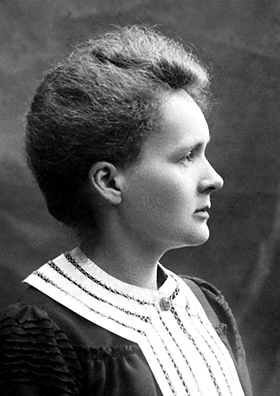

In [63]:
im::image marie("images/marie.png");
marie

### Audio example

In [64]:
#include <string>
#include <fstream>

#include "xtl/xbase64.hpp"
#include "xeus/xjson.hpp"

namespace au
{
    struct audio
    {   
        inline audio(const std::string& filename)
        {
            std::ifstream fin(filename, std::ios::binary);   
            m_buffer << fin.rdbuf();
        }
        
        std::stringstream m_buffer;
    };
    
    xeus::xjson mime_bundle_repr(const audio& a)
    {
        auto bundle = xeus::xjson::object();
        bundle["text/html"] =
           std::string("<audio controls=\"controls\"><source src=\"data:audio/wav;base64,")
           + xtl::base64encode(a.m_buffer.str()) +
            "\" type=\"audio/wav\" /></audio>";
        return bundle;
    }
}

In [65]:
au::audio drums("audio/audio.wav");
drums

<source src="data:audio/wav;base64,UklGRtTUBwBXQVZFZm10IBAAAAABAAIARKwAABCxAgAEABAAZGF0YWjUBwC5/+n/rf/s/7L/7f+4/+//vf/w/7n/7P+9/+v/wf/w/8H/8f/E//T/wf/z/8H/8f/E//H/wv/w/8H/7P++/+//wv/x/8D/7//C//H/xP/0/8H/7/++/+3/wf/x/8D/8f/B//D/wf/w/8H/9P/C//T/wv/z/8D/8/+9//H/wP/x/73/8P+8//D/vv/z/77/8P++//T/vf/x/77/9P+8//H/vP/v/7z/8P++//P/wf/3/8L/9f++//H/wP/0/77/9//B//f/wv/z/77/9f++//X/vv/x/8L/9f++//P/vP/1/73/9f++//f/wf/5/73/9/+8//f/vf/5/7n/9/+5//f/tv/3/7j/9P+x//H/0v8JAAEAKADh/xEAi//K/yn+wv4F/QT+xP2u/rUA2QB1A70CuASNAyoF0wPQBIQDQQNSAgUA9P+E+7r84/dB+mX2UPnL9q75kPdE+tL5/Pss/i7/MgOyAqwFQwTDBG4DUgKwAY4BPAEHAdYAbf+h/xz9/P3R+yn9F/xr/cr86v0L/RD+HP0l/iv/xv82BH4DvwlYB+8MYQnvC2gIcAceBSwDLwK0AIsA0P8AAKj/6/+h/+f/TgBvAAwCugE1BEkDLwamBIwHkAVRCBIGLwjoBaUHhgUdBygFeAazBKUFHgSxBHED3wPcAlsDhgL/AkMCrgIJAkkCwQH0AMUAg//G/4r/6P8sAvMBUQewBR4NuQneECoM0g8bC7MJiAYo/+T+ofIG9nrp5+9V6Wzw7/Hn9pL8UP62/i7/tfie+oT08/d/+Rj8oQa9BQgSYA2GEgoNpwytCAoIrwVZB1YF7AOYAmH5yvp+68/whN/k6DPneu9L7C3yqecE7z7yPPdD+0P92f9EAPcA0QBL/4f/+Pze/Uf3fPlx7MDxUukv8ODrJfJV7tvzUvAx9Zjve/SP76v01PBb9cbpB/C56P/vbvno/EYXSRIJKl4eESSSGFAO8AgHA9cBpf4A/+z89P0Q/Eb9r/mS+1X6SvwM/9j//wXPBM4K+gftDRkK4Q9YC0UOBgojCv4GoQXjA3sCvAGs/73/Mfw+/Vn4h/oJ9gn5IPY4+UT42fqf+nf89vqR/ED5Rftb+MP6NP2h/gcHswVJD1kLQgs6B5Hv0vL14z7szegE8PHqh/HP8Wn2T+oK8NTlFu6a/QsAMRLpDS8atxJrFN8N4gisBfwAdQCtAYUBtAi3BtkNCwo9C6kHogQWAwwFzQNPB2wF9g1zCqYVhw8tEosMgA/xCpQPBgtBD9AKCg+hCmgOMwo1DhoKBQ72CToOHwpUDjMKLg4PCpANwwnvDQ4K1Q6DCjwPqApcD7AKEg+ZCiUOJwqqDGoJ6gyoCRUPzgpIEc8LehG/C3wOGwoRC3oImQpkCDAOVApwEcQLfhDvCuIN1Al1CvoHgwzSCfYShw2dCwwHD/9n/mX1VPjk8qb3ZQGYApgSAg7lGGoRAhSLDcwL/gcVCbwGpg0rCusN+gn+D68LXxB8C5gFcQOp/tj+wvod/P34LPun+dL7efcx+trwIfVA6QnwvvKk9wv9ZP7w/lf/4P1v/kX5GPsH9TP4AfF99fDtiPNx6VnwJ+ip7x3uqvOy8hX2GvMV9hbuNPP35VDvgue/8HnxHfb0+Qz6uPNR9pjtgPMI7WHzMu7782ns5/Kx7dvzFfQO96z1Dfcb9C33Hu4C9WfqsPP9+Av8jwj1A+oIzQOM+lb8xO4a9+71xvtaCOcEBg0bBuAAEf8x8F32LOyv9HT3nvqUCdMFpRJ1DBELLwldCfcH4Q7oCZMQDgrvBGEDHfot/gT+pAD5DgIJHA+1B9QFAARX+Rz9f+dp75vnF+7A7DLxtOsi8r7o+/D668DysPPh9vn1M/g27rDzrugi8Wzuz/R6+un6dPop+gjuhPND5Bbv6egr8vz5NfuKArj+Y/bR99Xk7u7U5PTvpPQa+KX6DPpk+HT6m/aa+zf9if9cCawFAQoaBQH+6P4D9Mv6If11AB4OLgjJECEHtvvl+mbkqO9w4VXv5vL596UEHQArAyP/AflF/EL9SwFVCKUH4Q6gCZQJTQUVAIoAk/tI/isBzgDaC8EFigN+AaQAYgTfDYwOsBwFFBolyBU3GBMNPv9vAOv1QP2cAH0DqhH6CyIZYw8xEk4MHBAlDNoV8w49FMoN1wlRCCcAdwJlAFcAagaJAWwIUgN4BJIEBwS9BzUKCwqyGhES0yReF1cUtw7bCfYLOBD+DzYaaBH0BmYAOOY77aXO/eE0zAzicfUf/GUaRBE+IHoVNhndE2MUiBEqGfETPx3oFR0Vmg/4BtQEDPxz/Kb4Afr/63Tz++bT8g32Yv2kEPkOMCUyHaYsHCakMOUuGzewN+1J9USgWZBM6lClRD44TjUxJvoqLSmHK1I4sDAVOr8rhycGHAYPoAu+/UMBSP1WAX4G5wUhB68F+BqSFKgk6xkIEhMMvP71/q7yu/Vl9XP1agDG+SIF5/iz/OfwpeZs4VXGOMyBvDjHeMGfyRXFRMoBzN7MUcUSyA23usD9sP6+Zr79xlXX7NQM57LbXtvs06m09rMepQCetKhVo+erLK/EutC+Y8a7x9vDg8cnu0LDHbPHv7OxBr9jtXK/1r5iwTbF1sASvOi4+q6JqIetgKMYr8isHLjLvKrRbtH41/PXw8r600zLedo62ublh+m17Tjpoevr3mPk09lD4Dne7OCM4Ezg7NU12uHIXtSZzUTaxfY99u8Hcv9P+fn3FupF80bnXfQs9BP8DP9pACb4APu+9Pb5qPXp+YP2jvkABqIEcv9b/4TyQPfd+s785wx8B5INbQZj9yn5LOi48oro7vSf9Qj9PQQUBToDXgUhEk8WNSviLFc04TVRRMNAGEl8QlFAPDyRMl0ydTxhO81JkUU8RNhD/UokSmhRs03/UPFMj0odSbs+0UFBQbNB1U8ZR+pSnUe7Tm5HVUtjSghOC1NfTrVbfE0/Xq1M91iBSLZJBDVdORwwOzV5OoQ6MEESPS02TTaXLNUzNUJrRaRSIFtOU15js1KYWZMw7DK3KcMsnyv9K8AW3x8rG/ciWCyxLHRC5zl5Sok9qzhUMOMcfR4oD0oY+hz2I+YsKC9pMEAwNSwrKtog1B4xLWAlhjUuKFYWGxM0AqEGwQWsB3YbUBPuLjMdCSPRFX4IPgje+hsCdgBpBfMOZQyyGuoR4yDBFIEcwREgEBEKo/6b/sTp2vBp593sq/Z48QoGm/bHCrf3MPbZ7djZueKa1LrjzO0D8nkPNAH/FqIAe/vF78XQ3tZ5xv/SVelr6Fv8J/JR9jvud+r06J71u/Ce7bDomt/m3hHabdvg1aXXYsqXzwPCH8oFzGjOXtRf0cHS6M9fysjMCsfIzX3Pz9Op1sfWNthl13Pia96476HoIvHc6m7hL+Lc5SXlsvPn6pPyiuY82eDUCLY/v+astrqrw8vHv9MnzyLGgMUYrMW1t6SqsgXIm8jU5kPXMN2+znS9Cr3zpYimaacjn5WqeKcvtviyf7nWtpqw+K6Orlyn6632o2KxDq5xvti/Bbd6vJXBHsKj2R/LFt23yZu+H7cBrN6l3a65ozGtgaxawY/FGNFKzjjKI8ly1b/TL+jx4+znmuQIxm3OnK72vHqvkb8hw5HPW9LH12/gx9+940DhaNuX3o7hpuPa3svi5Ndu4FXWIOGg3ijn9t8i6PHgP+rA/Un6RwUt/hX2OPcc4MvsnNqN63/aH+zR6Ov2eQ/5D6E4YSUqOC4icghyCHvbzPKU2PfzhQCtCucpqCDELXIiow5QEn75sQn8D7IYmDTmLaw3BC5/EroXiuuyAvH7qg61KHQnWTiXLjEuMCdGDB0V9/b1DSkHtBqWKV4sxDRYLtgjjyVTGR0mETzfQPBjGlZeXEBLOFM4RV4wSy9ZC

### Display

In [66]:
#include "xcpp/xdisplay.hpp"

In [67]:
xcpp::display(drums);

<source src="data:audio/wav;base64,UklGRtTUBwBXQVZFZm10IBAAAAABAAIARKwAABCxAgAEABAAZGF0YWjUBwC5/+n/rf/s/7L/7f+4/+//vf/w/7n/7P+9/+v/wf/w/8H/8f/E//T/wf/z/8H/8f/E//H/wv/w/8H/7P++/+//wv/x/8D/7//C//H/xP/0/8H/7/++/+3/wf/x/8D/8f/B//D/wf/w/8H/9P/C//T/wv/z/8D/8/+9//H/wP/x/73/8P+8//D/vv/z/77/8P++//T/vf/x/77/9P+8//H/vP/v/7z/8P++//P/wf/3/8L/9f++//H/wP/0/77/9//B//f/wv/z/77/9f++//X/vv/x/8L/9f++//P/vP/1/73/9f++//f/wf/5/73/9/+8//f/vf/5/7n/9/+5//f/tv/3/7j/9P+x//H/0v8JAAEAKADh/xEAi//K/yn+wv4F/QT+xP2u/rUA2QB1A70CuASNAyoF0wPQBIQDQQNSAgUA9P+E+7r84/dB+mX2UPnL9q75kPdE+tL5/Pss/i7/MgOyAqwFQwTDBG4DUgKwAY4BPAEHAdYAbf+h/xz9/P3R+yn9F/xr/cr86v0L/RD+HP0l/iv/xv82BH4DvwlYB+8MYQnvC2gIcAceBSwDLwK0AIsA0P8AAKj/6/+h/+f/TgBvAAwCugE1BEkDLwamBIwHkAVRCBIGLwjoBaUHhgUdBygFeAazBKUFHgSxBHED3wPcAlsDhgL/AkMCrgIJAkkCwQH0AMUAg//G/4r/6P8sAvMBUQewBR4NuQneECoM0g8bC7MJiAYo/+T+ofIG9nrp5+9V6Wzw7/Hn9pL8UP62/i7/tfie+oT08/d/+Rj8oQa9BQgSYA2GEgoNpwytCAoIrwVZB1YF7AOYAmH5yvp+68/whN/k6DPneu9L7C3yqecE7z7yPPdD+0P92f9EAPcA0QBL/4f/+Pze/Uf3fPlx7MDxUukv8ODrJfJV7tvzUvAx9Zjve/SP76v01PBb9cbpB/C56P/vbvno/EYXSRIJKl4eESSSGFAO8AgHA9cBpf4A/+z89P0Q/Eb9r/mS+1X6SvwM/9j//wXPBM4K+gftDRkK4Q9YC0UOBgojCv4GoQXjA3sCvAGs/73/Mfw+/Vn4h/oJ9gn5IPY4+UT42fqf+nf89vqR/ED5Rftb+MP6NP2h/gcHswVJD1kLQgs6B5Hv0vL14z7szegE8PHqh/HP8Wn2T+oK8NTlFu6a/QsAMRLpDS8atxJrFN8N4gisBfwAdQCtAYUBtAi3BtkNCwo9C6kHogQWAwwFzQNPB2wF9g1zCqYVhw8tEosMgA/xCpQPBgtBD9AKCg+hCmgOMwo1DhoKBQ72CToOHwpUDjMKLg4PCpANwwnvDQ4K1Q6DCjwPqApcD7AKEg+ZCiUOJwqqDGoJ6gyoCRUPzgpIEc8LehG/C3wOGwoRC3oImQpkCDAOVApwEcQLfhDvCuIN1Al1CvoHgwzSCfYShw2dCwwHD/9n/mX1VPjk8qb3ZQGYApgSAg7lGGoRAhSLDcwL/gcVCbwGpg0rCusN+gn+D68LXxB8C5gFcQOp/tj+wvod/P34LPun+dL7efcx+trwIfVA6QnwvvKk9wv9ZP7w/lf/4P1v/kX5GPsH9TP4AfF99fDtiPNx6VnwJ+ip7x3uqvOy8hX2GvMV9hbuNPP35VDvgue/8HnxHfb0+Qz6uPNR9pjtgPMI7WHzMu7782ns5/Kx7dvzFfQO96z1Dfcb9C33Hu4C9WfqsPP9+Av8jwj1A+oIzQOM+lb8xO4a9+71xvtaCOcEBg0bBuAAEf8x8F32LOyv9HT3nvqUCdMFpRJ1DBELLwldCfcH4Q7oCZMQDgrvBGEDHfot/gT+pAD5DgIJHA+1B9QFAARX+Rz9f+dp75vnF+7A7DLxtOsi8r7o+/D668DysPPh9vn1M/g27rDzrugi8Wzuz/R6+un6dPop+gjuhPND5Bbv6egr8vz5NfuKArj+Y/bR99Xk7u7U5PTvpPQa+KX6DPpk+HT6m/aa+zf9if9cCawFAQoaBQH+6P4D9Mv6If11AB4OLgjJECEHtvvl+mbkqO9w4VXv5vL596UEHQArAyP/AflF/EL9SwFVCKUH4Q6gCZQJTQUVAIoAk/tI/isBzgDaC8EFigN+AaQAYgTfDYwOsBwFFBolyBU3GBMNPv9vAOv1QP2cAH0DqhH6CyIZYw8xEk4MHBAlDNoV8w49FMoN1wlRCCcAdwJlAFcAagaJAWwIUgN4BJIEBwS9BzUKCwqyGhES0yReF1cUtw7bCfYLOBD+DzYaaBH0BmYAOOY77aXO/eE0zAzicfUf/GUaRBE+IHoVNhndE2MUiBEqGfETPx3oFR0Vmg/4BtQEDPxz/Kb4Afr/63Tz++bT8g32Yv2kEPkOMCUyHaYsHCakMOUuGzewN+1J9USgWZBM6lClRD44TjUxJvoqLSmHK1I4sDAVOr8rhycGHAYPoAu+/UMBSP1WAX4G5wUhB68F+BqSFKgk6xkIEhMMvP71/q7yu/Vl9XP1agDG+SIF5/iz/OfwpeZs4VXGOMyBvDjHeMGfyRXFRMoBzN7MUcUSyA23usD9sP6+Zr79xlXX7NQM57LbXtvs06m09rMepQCetKhVo+erLK/EutC+Y8a7x9vDg8cnu0LDHbPHv7OxBr9jtXK/1r5iwTbF1sASvOi4+q6JqIetgKMYr8isHLjLvKrRbtH41/PXw8r600zLedo62ublh+m17Tjpoevr3mPk09lD4Dne7OCM4Ezg7NU12uHIXtSZzUTaxfY99u8Hcv9P+fn3FupF80bnXfQs9BP8DP9pACb4APu+9Pb5qPXp+YP2jvkABqIEcv9b/4TyQPfd+s785wx8B5INbQZj9yn5LOi48oro7vSf9Qj9PQQUBToDXgUhEk8WNSviLFc04TVRRMNAGEl8QlFAPDyRMl0ydTxhO81JkUU8RNhD/UokSmhRs03/UPFMj0odSbs+0UFBQbNB1U8ZR+pSnUe7Tm5HVUtjSghOC1NfTrVbfE0/Xq1M91iBSLZJBDVdORwwOzV5OoQ6MEESPS02TTaXLNUzNUJrRaRSIFtOU15js1KYWZMw7DK3KcMsnyv9K8AW3x8rG/ciWCyxLHRC5zl5Sok9qzhUMOMcfR4oD0oY+hz2I+YsKC9pMEAwNSwrKtog1B4xLWAlhjUuKFYWGxM0AqEGwQWsB3YbUBPuLjMdCSPRFX4IPgje+hsCdgBpBfMOZQyyGuoR4yDBFIEcwREgEBEKo/6b/sTp2vBp593sq/Z48QoGm/bHCrf3MPbZ7djZueKa1LrjzO0D8nkPNAH/FqIAe/vF78XQ3tZ5xv/SVelr6Fv8J/JR9jvud+r06J71u/Ce7bDomt/m3hHabdvg1aXXYsqXzwPCH8oFzGjOXtRf0cHS6M9fysjMCsfIzX3Pz9Op1sfWNthl13Pia96476HoIvHc6m7hL+Lc5SXlsvPn6pPyiuY82eDUCLY/v+astrqrw8vHv9MnzyLGgMUYrMW1t6SqsgXIm8jU5kPXMN2+znS9Cr3zpYimaacjn5WqeKcvtviyf7nWtpqw+K6Orlyn6632o2KxDq5xvti/Bbd6vJXBHsKj2R/LFt23yZu+H7cBrN6l3a65ozGtgaxawY/FGNFKzjjKI8ly1b/TL+jx4+znmuQIxm3OnK72vHqvkb8hw5HPW9LH12/gx9+940DhaNuX3o7hpuPa3svi5Ndu4FXWIOGg3ijn9t8i6PHgP+rA/Un6RwUt/hX2OPcc4MvsnNqN63/aH+zR6Ov2eQ/5D6E4YSUqOC4icghyCHvbzPKU2PfzhQCtCucpqCDELXIiow5QEn75sQn8D7IYmDTmLaw3BC5/EroXiuuyAvH7qg61KHQnWTiXLjEuMCdGDB0V9/b1DSkHtBqWKV4sxDRYLtgjjyVTGR0mETzfQPBjGlZeXEBLOFM4RV4wSy9ZC

### Update-display

In [68]:
#include <string>
#include "xcpp/xdisplay.hpp"

namespace ht
{
    struct html
    {   
        inline html(const std::string& content)
        {
            m_content = content;
        }
        std::string m_content;
    };

    xeus::xjson mime_bundle_repr(const html& a)
    {
        auto bundle = xeus::xjson::object();
        bundle["text/html"] = a.m_content;
        return bundle;
    }
}

// A red rectangle
ht::html rect(R"(
<div style='
    width: 90px;
    height: 50px;
    line-height: 50px;
    background-color: blue;
    color: white;
    text-align: center;'>
Original
</div>)");

In [69]:
xcpp::display(rect, "some_display_id");

Updated

In [ ]:
// Update the rectangle to be blue
rect.m_content = R"(
<div style='
    width: 90px;
    height: 50px;
    line-height: 50px;
    background-color: red;
    color: white;
    text-align: center;'>
Updated
</div>)";

xcpp::display(rect, "some_display_id", true);

## Magics

Magics are special commands for the kernel that are not part of the C++ language.

They are defined with the symbol `%` for a line magic and `%%` for a cell magic.

More documentation for magics is available at https://xeus-cling.readthedocs.io/en/latest/magics.html.

In [71]:
#include <algorithm>
#include <vector>

In [72]:
std::vector<double> to_shuffle = {1, 2, 3, 4};

In [73]:
%timeit std::random_shuffle(to_shuffle.begin(), to_shuffle.end());

329 ns +- 69.2 ns per loop (mean +- std. dev. of 7 runs 1000000 loops each)


[![xtensor](images/xtensor.png)](https://github.com/QuantStack/xtensor/)

- GitHub repository: https://github.com/QuantStack/xtensor/
- Online documentation: https://xtensor.readthedocs.io/
- NumPy to xtensor cheat sheet: http://xtensor.readthedocs.io/en/latest/numpy.html

`xtensor` is a C++ library for manipulating N-D arrays with an API very similar to that of numpy.

In [74]:
#include <iostream>

#include "xtensor/xarray.hpp"
#include "xtensor/xio.hpp"
#include "xtensor/xview.hpp"

xt::xarray<double> arr1
  {{1.0, 2.0, 3.0},
   {2.0, 5.0, 7.0},
   {2.0, 5.0, 7.0}};

xt::xarray<double> arr2
  {5.0, 6.0, 7.0};

xt::view(arr1, 1) + arr2

7. 11. 14.

Together with the C++ Jupyter kernel, `xtensor` offers a similar experience as `NumPy` in the Python Jupyter kernel, including broadcasting and universal functions.

In [75]:
#include <iostream>
#include "xtensor/xarray.hpp"
#include "xtensor/xio.hpp"

In [76]:
xt::xarray<int> arr
  {1, 2, 3, 4, 5, 6, 7, 8, 9};

arr.reshape({3, 3});

std::cout << arr;

{{1, 2, 3},
 {4, 5, 6},
 {7, 8, 9}}

In [77]:
#include "xtensor-blas/xlinalg.hpp"

In [78]:
xt::xtensor<double, 2> m = {{1.5, 0.5}, {0.7, 1.0}};
std::cout << "Matrix rank: " << std::endl << xt::linalg::matrix_rank(m) << std::endl;
std::cout << "Matrix inverse: " << std::endl << xt::linalg::inv(m) << std::endl;
std::cout << "Eigen values: " << std::endl << xt::linalg::eigvals(m) << std::endl;

Matrix rank: 
2
Matrix inverse: 
{{ 0.869565, -0.434783},
 {-0.608696,  1.304348}}
Eigen values: 
{ 1.892262+0.i,  0.607738+0.i}


In [79]:
xt::xarray<double> arg1 = xt::arange<double>(9);
xt::xarray<double> arg2 = xt::arange<double>(18);

arg1.reshape({3, 3});
arg2.reshape({2, 3, 3});

std::cout << xt::linalg::dot(arg1, arg2) << std::endl;

{{{  15.,   18.,   21.},
  {  42.,   45.,   48.}},
 {{  42.,   54.,   66.},
  { 150.,  162.,  174.}},
 {{  69.,   90.,  111.},
  { 258.,  279.,  300.}}}
